In [6]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Problem 1.

### 1.

In [119]:
data = fetch_openml(data_id=22, as_frame=True)
X = np.array(data.data)
y = np.array(data.target)
y = np.array([int(i) for i in y])
X.shape, y.shape

((2000, 47), (2000,))

I select the mfeat-zernike dataset. 

Number of features: 47

Number of instances: 2000

Number of classes: 10

Number of numerical features: 47

Number of categorical features: 0

In [122]:
unique_classes = np.unique(y)
each_class_count = np.array([(y == i).sum() for i in unique_classes])

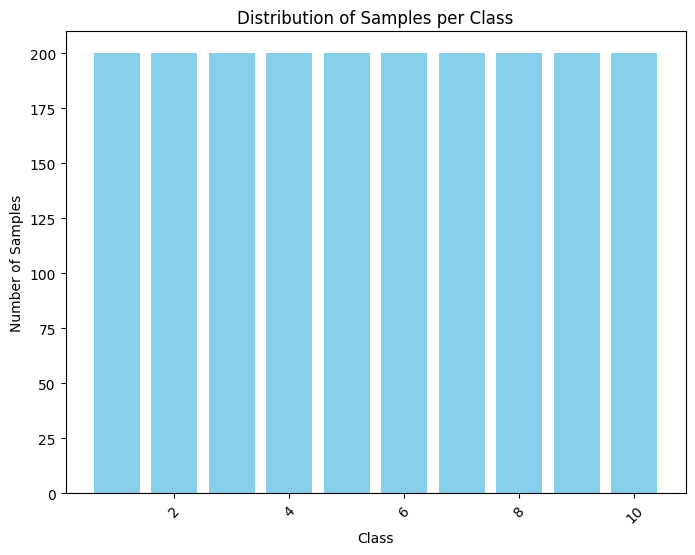

In [123]:
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, each_class_count, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class')
plt.xticks(rotation=45)  # Rotate class labels to avoid overlap
plt.show()

As is shown in the figure, the dataset is balanced.

### 2.

In [124]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from time import time
import pandas as pd

# Split the dataset into training and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store results
results = []

# Define the fractions of the training set to use
fractions = np.linspace(0.1, 1.0, 10)

# Train models and collect data
for fraction in fractions:
    # Calculate the number of samples for the current fraction
    num_samples = int(fraction * len(X_train))
    
    # Randomly sample the training set
    idx = np.random.choice(np.arange(len(X_train)), size=num_samples, replace=False)
    X_train_subset = X_train[idx]
    y_train_subset = y_train[idx]
    
    # Decision Tree Classifier
    dt_start_time = time()
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train_subset, y_train_subset)
    dt_end_time = time()
    dt_train_time = dt_end_time - dt_start_time
    dt_accuracy = accuracy_score(y_test, dt_clf.predict(X_test))
    
    # Gradient Boosting Classifier
    gb_start_time = time()
    gb_clf = GradientBoostingClassifier()
    gb_clf.fit(X_train_subset, y_train_subset)
    gb_end_time = time()
    gb_train_time = gb_end_time - gb_start_time
    gb_accuracy = accuracy_score(y_test, gb_clf.predict(X_test))
    
    # Store results
    results.append({
        'Fraction': fraction,
        'DT Accuracy': dt_accuracy,
        'DT Train Time (s)': dt_train_time,
        'GB Accuracy': gb_accuracy,
        'GB Train Time (s)': gb_train_time
    })

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
results_df


,Fraction,DT Accuracy,DT Train Time (s),GB Accuracy,GB Train Time (s)
0,0.1,0.630,0.009658,0.6500,1.580345
1,0.2,0.635,0.006444,0.7250,3.024185
2,0.3,0.605,0.011580,0.7500,4.542917
3,0.4,0.650,0.015707,0.7650,6.164823
4,0.5,0.640,0.023251,0.7625,7.883507
5,0.6,0.660,0.027096,0.7750,9.322577
6,0.7,0.650,0.029797,0.7775,11.444339
7,0.8,0.675,0.040253,0.7600,12.872247
8,0.9,0.640,0.043167,0.7625,14.873640
9,1.0,0.690,0.064536,0.7600,16.510336


### 3.

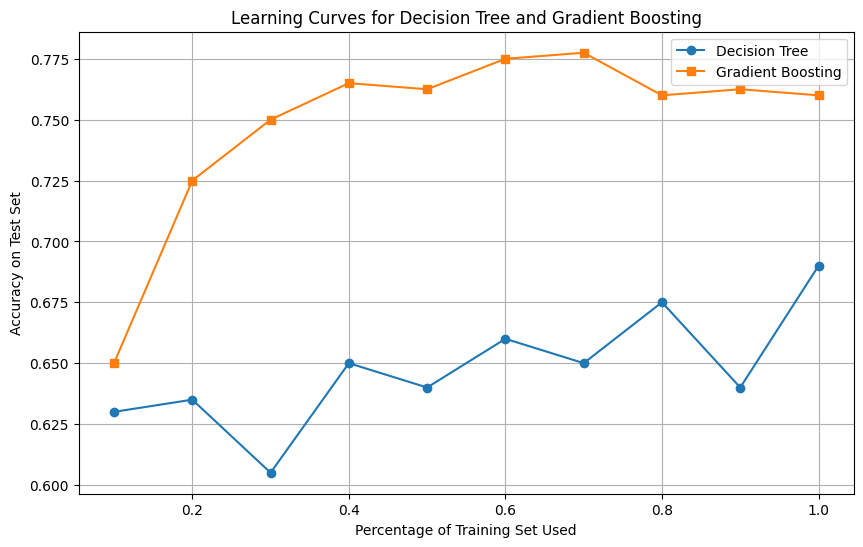

In [125]:
# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(results_df['Fraction'], results_df['DT Accuracy'], label='Decision Tree', marker='o')
plt.plot(results_df['Fraction'], results_df['GB Accuracy'], label='Gradient Boosting', marker='s')

plt.title('Learning Curves for Decision Tree and Gradient Boosting')
plt.xlabel('Percentage of Training Set Used')
plt.ylabel('Accuracy on Test Set')
plt.legend()
plt.grid(True)
plt.show()

### 4.

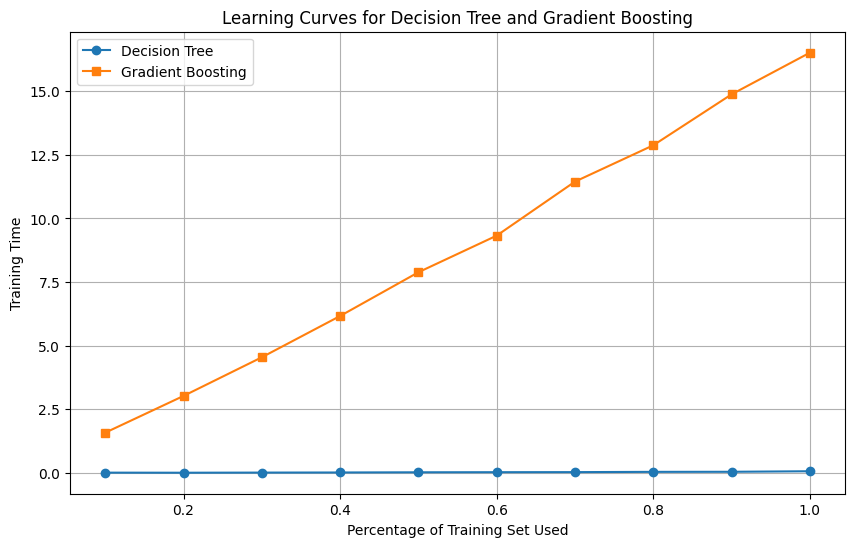

In [135]:
# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(results_df['Fraction'], results_df['DT Train Time (s)'], label='Decision Tree', marker='o')
plt.plot(results_df['Fraction'], results_df['GB Train Time (s)'], label='Gradient Boosting', marker='s')

plt.title('Learning Curves for Decision Tree and Gradient Boosting')
plt.xlabel('Percentage of Training Set Used')
plt.ylabel('Training Time')
plt.legend()
plt.grid(True)
plt.show()

### 5.

Training Time:

Decision Trees tend to have shorter training times compared to Gradient Boosting for smaller datasets. This is because Decision Trees are simpler models that require fitting a single tree to the data. With the increase of the dataset size, the training time of Gradient Boosting will rapidly increase whereas the training time of Decision Trees almost does not increase.

Accuracy:

Gradient Boosting generally achieves much better accuracy than Decision Trees across a wide range of dataset sizes. With the increase of dataset size, both accuracies increase despite slight fluctuation, but the accuracy of Gradient Boosting increases faster than that of Decision Trees. For Gradient Boosting, increasing the training data size generally leads to improved accuracy up to a point, after which the gains in accuracy diminish.

# Problem 2.

### 1.

For ROC curve, TNs matter indirectly because they affect the calculation of FPR, which is one of the dimensions of the ROC curve. For PR curve, TN doesn't matter since it is not involved in the calculation of Precision and Recall.

The one-to-one correspondence between ROC curve and PR curve is due to the fact that both curves are generated by varying the threshold used by the classifier to assign observations to one of two classes. Changing the threshold alters the TP, FP, TN, and FN counts, which in turn affects both TPR and FPR (for the ROC curve) and Precision and Recall (for the PR curve). Thus, for any given threshold, there is a specific set of TP, FP, TN, and FN values, leading to a unique point on each curve.

### 2.

In [17]:
data = fetch_openml(data_id=1464, as_frame=True)
X = np.array(data.data)
y = label_binarize(data.target, classes=['1', '2'])  # Assuming '1' and '2' are the class labels
y = np.ravel(y)
X.shape, y.shape

((748, 4), (748,))

/Users/gengliyuan/anaconda3/envs/DSUA301/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


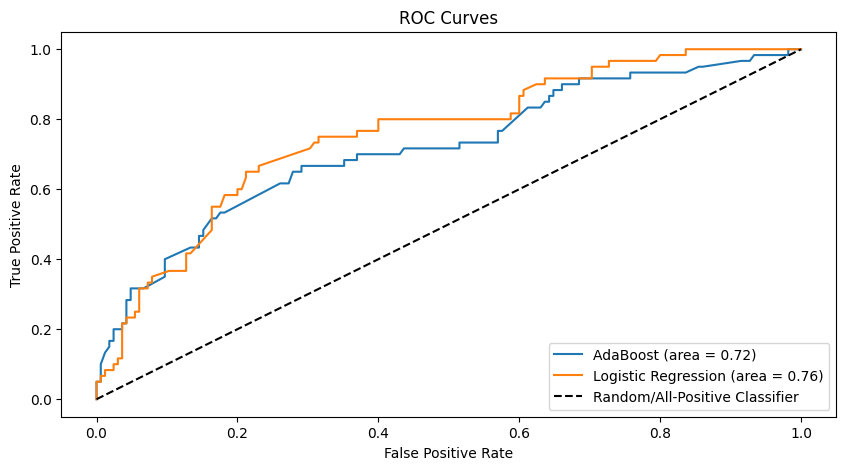

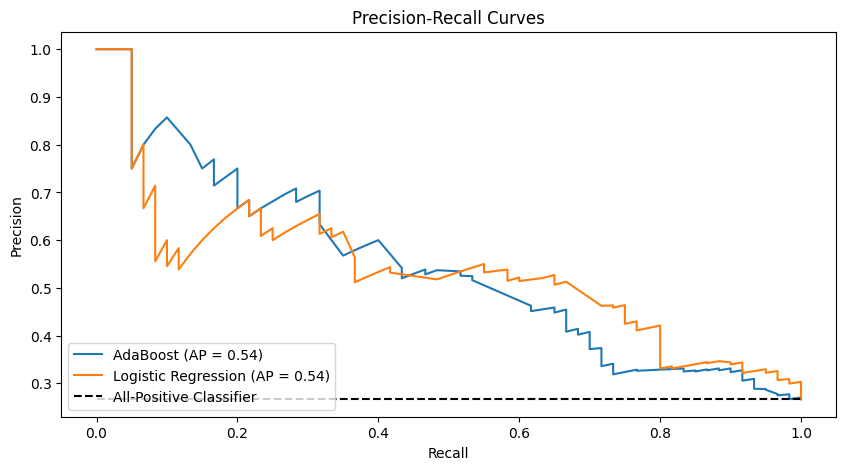

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize classifiers
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train classifiers
ada_clf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_score_ada = ada_clf.predict_proba(X_test)[:, 1]
y_score_log = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC metrics
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_score_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Compute Precision-Recall metrics
precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_score_ada)
average_precision_ada = average_precision_score(y_test, y_score_ada)

precision_log, recall_log, _ = precision_recall_curve(y_test, y_score_log)
average_precision_log = average_precision_score(y_test, y_score_log)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (area = {roc_auc_ada:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (area = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random/All-Positive Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 5))
plt.plot(recall_ada, precision_ada, label=f'AdaBoost (AP = {average_precision_ada:.2f})')
plt.plot(recall_log, precision_log, label=f'Logistic Regression (AP = {average_precision_log:.2f})')
plt.plot([0, 1], [len(y_test[y_test == 1]) / len(y_test), len(y_test[y_test == 1]) / len(y_test)], 'k--', label='All-Positive Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()

# Problem 3.

### 1, 2.

In [27]:
# Generating training data set
np.random.seed(0)  # For reproducibility
train_points = np.random.rand(10, 2)  # 10 points in the unit square
train_labels = np.array([1 if x1 > x2 else -1 for x1, x2 in train_points])

# Generating test data set
test_points = np.random.rand(5000, 2)
test_labels = np.array([1 if x1 > x2 else -1 for x1, x2 in test_points])

In [93]:
class Perceptron:
    def __init__(self, loss, learning_rate=0.01, n_iterations=20000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss = loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training process
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)
                
                # Update rules
                if self.loss == 'perceptron':
                    if y_predicted != y[idx]:
                        update = self.learning_rate * y[idx]
                        self.weights += update * x_i
                        self.bias += update
                elif self.loss == 'hinge':
                    if 1 - y[idx] * linear_output > 0:
                        update = self.learning_rate * y[idx]
                        self.weights += update * x_i
                        self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)


In [94]:
perceptron = Perceptron('perceptron')
perceptron.fit(train_points, train_labels)
y_preds = perceptron.predict(test_points)
assert len(y_preds) == len(test_labels)
percep_acc = (y_preds == test_labels).sum() / len(test_labels)
percep_acc

0.9906

In [95]:
hingePerceptron = Perceptron('hinge')
hingePerceptron.fit(train_points, train_labels)
hinge_y_preds = hingePerceptron.predict(test_points)
assert len(hinge_y_preds) == len(test_labels)
hinge_percep_acc = (hinge_y_preds == test_labels).sum() / len(test_labels)
hinge_percep_acc

0.98

### 3.

Clearly, from the results above, perceptron criterion obtains better test accuracy.

The perceptron criterion, also known as the perceptron loss, updates the model's weights only when a prediction is incorrect. This can make the model more robust to outliers, as it doesn't try to adjust the decision boundary for correctly classified instances.

On the other hand, the hinge loss tries to maximize the margin between the classes, which can lead to better generalization on some datasets. However, it's more sensitive to outliers than the perceptron loss, as it tries to adjust the decision boundary even for correctly classified instances that are close to the boundary.

In our case, since the data is randomly generated, there may be outliers and may be not linearly seperable, and therefore, the perceptron criterion obtains better test accuracy.

### 4.

Hinge loss is expected to offer more stability for training. This is because the hinge loss's focus on margin maximization makes it less sensitive to minor variations in the training data, assuming the essential characteristics of the margin remain relatively unchanged between different sets of 10 training points.

# Problem 4.

In [78]:
class1_points = np.array([[-1, -1], [1, 1], [-3, -3], [4, 4]])
class2_points = np.array([[-1, 1], [1, -1], [-5, 2], [4, -8]])

### 1.

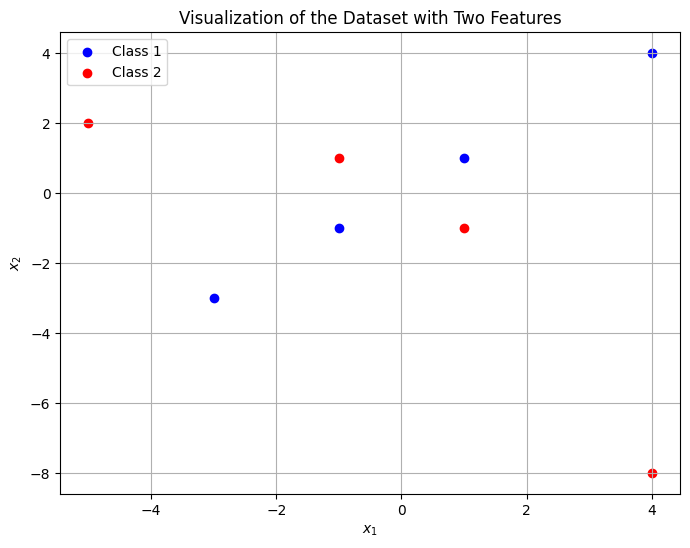

In [81]:
# Plotting the points again using the defined numpy arrays for clarity

plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', label='Class 1')
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', label='Class 2')

# Adding labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.title('Visualization of the Dataset with Two Features')
plt.show()


This dataset is not linearly separable, and hence, a lienar classifier will not be able to classify. 

### 2.

In [102]:
def transform(X):
    return (X[:, 0] - X[:, 1]) ** 2

z1_points = transform(class1_points)
z2_points = transform(class2_points)
z1_points, z2_points

(array([0, 0, 0, 0]), array([  4,   4,  49, 144]))

We define the transform function to be $z = (x_1 - x_2)^2$, then the transformed data is linearly separable.

### 3.

The separating hyperplane is $ x = 2 $, it is a horizontal line in the 1-dimensional space.

### 4.

Nonlinear transformations play a crucial role in solving classification problems, especially when dealing with complex datasets that are not linearly separable in their original feature space. The essence of these transformations is to map the input data into a new space where the separation between different classes can be done through linear methods. Many machine learning algorithms, especially linear classifiers like linear regression, logistic regression, and linear support vector machines, rely on the assumption that classes can be separated by a linear boundary.